In [1]:
from sklearn.datasets import fetch_openml
import joblib
import os
if os.path.exists("mnist_dataset.joblib"):
    print("loading from device")
    mnist = joblib.load("mnist_dataset.joblib")
else:
    print("fetching from server")
    mnist = fetch_openml("mnist_784", version=1)
    joblib.dump(mnist, "mnist_dataset.joblib")
mnist.keys()

loading from device


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
print(mnist["DESCR"])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
X, y = mnist.data, mnist.target

In [4]:
X.shape, y.shape

((70000, 784), (70000,))

In [5]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
firstImage = X.iloc[0,:].to_numpy().reshape(28, 28)
firstImage[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

label:  5 <class 'str'>


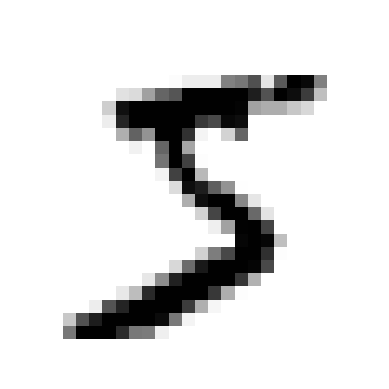

In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.imshow(firstImage, cmap=cm.binary)
plt.axis("off")
print("label: ",y[0], type(y[0]))

In [8]:
import numpy as np
y=y.astype(np.float64)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
from sklearn.linear_model import SGDClassifier
#  doing binay classififcation for 5 or (not 5)
y_train_5, y_test_5 = y_train==5, y_test==5
print(y_train_5.value_counts())
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

class
False    54579
True      5421
Name: count, dtype: int64


SGDClassifier(random_state=42)

In [10]:
sgd_clf.predict([X.iloc[0, :]])

c:\Users\Vigna\anaconda3\envs\with_cuda\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [11]:
from sklearn.model_selection import cross_val_score
a123 = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
b123 = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="precision")
c123 = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="recall")
print("accuracy: ", a123, "\nprecesion: ", b123, "\nRecall:", c123)

accuracy:  [0.95035 0.96035 0.9604 ] 
precesion:  [0.95936795 0.89060092 0.74963109] 
Recall: [0.47039292 0.63973437 0.84338683]


In [12]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [13]:
y_pred.shape

(60000,)

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [15]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
print("precision_score: ", precision_score(y_train_5, y_pred))
print("recall_score: ", recall_score(y_train_5, y_pred))
print("accracy_score: ", accuracy_score(y_train_5, y_pred))


precision_score:  0.8370879772350012
recall_score:  0.6511713705958311
accracy_score:  0.9570333333333333


In [16]:
from sklearn.metrics import f1_score
print("f1_score: ", f1_score(y_train_5, y_pred))

f1_score:  0.7325171197343846


In [17]:
y_scores = sgd_clf.decision_function([X.iloc[0, :]])
y_scores

c:\Users\Vigna\anaconda3\envs\with_cuda\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [18]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [19]:
from sklearn.metrics import precision_recall_curve
prec, rec, thres = precision_recall_curve(y_train_5, y_scores)

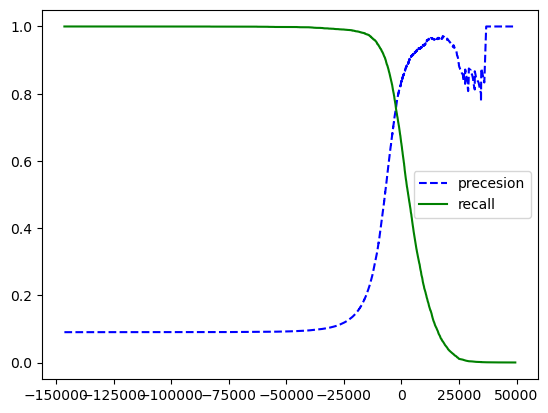

In [20]:
def plot_prec_recall_vs_thres(prec, rec, thres):
    plt.plot(thres, prec[:-1],"b--", label="precesion")
    plt.plot(thres, rec[:-1],"g-" ,label="recall")
    plt.legend()
plot_prec_recall_vs_thres(prec, rec, thres)

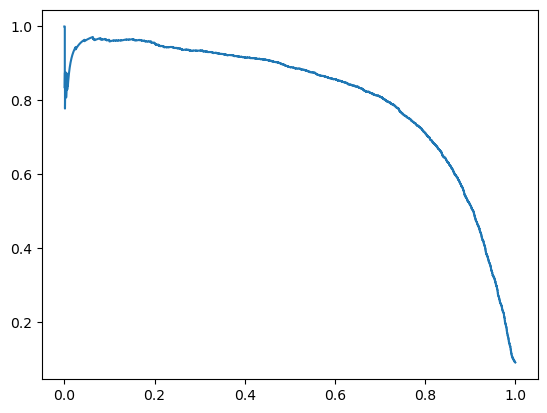

In [21]:
plt.plot(rec, prec)

In [22]:
thres_90_prec = thres[np.argmax(prec>0.9)]

In [23]:
y_train_pred_90 = (y_scores>=thres_90_prec)

In [24]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [25]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

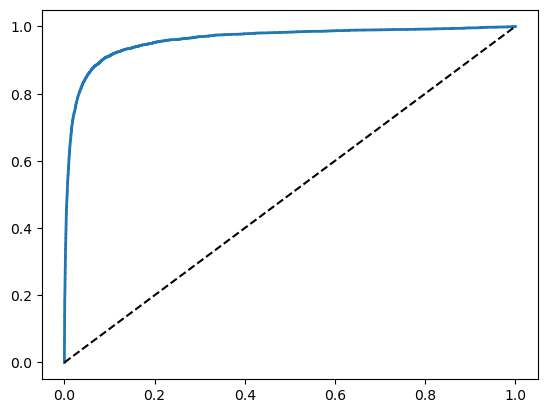

In [26]:
from sklearn.metrics import roc_curve
fpr, tpr, thr = roc_curve(y_train_5, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],"k--")
plot_roc_curve(fpr, tpr)

In [27]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [28]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [29]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thres_forest = roc_curve(y_train_5, y_scores_forest)

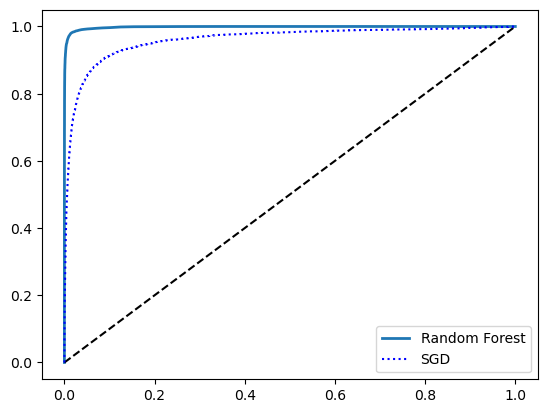

In [30]:
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot(fpr, tpr, "b:", label="SGD")
plt.legend()

In [31]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [32]:
# y_scores_forest.shape, y_train_5.shape
# y_scores_forest[:10]
precision_score(y_train_5, y_scores_forest>0.5), recall_score(y_train_5, y_scores_forest>0.5)

(0.9905083315756169, 0.8662608374838591)

In [33]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([X.iloc[0, :]])

c:\Users\Vigna\anaconda3\envs\with_cuda\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3.])

In [34]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [35]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [36]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [37]:
y_train_pred = cross_val_predict(sgd_clf, x_train_scaled, y_train, cv=3)
conf_mat = confusion_matrix(y_train, y_train_pred)
conf_mat

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

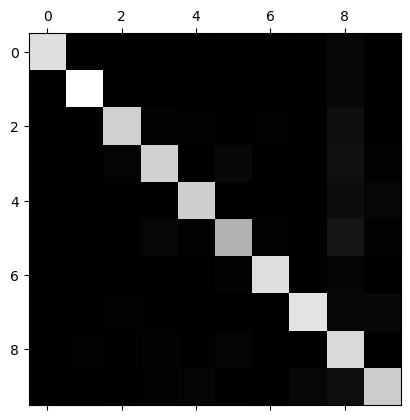

In [38]:
plt.matshow(conf_mat, cmap=plt.cm.gray)
plt.show()

In [39]:
row_sums = conf_mat.sum(axis=1, keepdims = True)
norm_conf_mat = conf_mat/row_sums

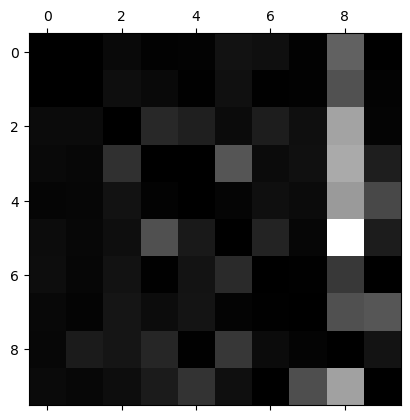

In [42]:
np.fill_diagonal(norm_conf_mat, 0)
plt.matshow(norm_conf_mat, cmap=plt.cm.gray)
plt.show()

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knei = KNeighborsClassifier()
knei.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
# knei.predict(X_train.iloc[:5,:].to_numpy())
accuracy_score(y_train, knei.predict(X_train.to_numpy()))

c:\Users\Vigna\anaconda3\envs\with_cuda\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9819166666666667

In [57]:
accuracy_score(y_test.to_numpy(), knei.predict(X_test.to_numpy()))

c:\Users\Vigna\anaconda3\envs\with_cuda\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9688

In [65]:
from sklearn.model_selection import GridSearchCV
param_grid=[{"n_neighbors":[1,3,5,7], "weights":["uniform","distance"]}]
grid_search = GridSearchCV(
    knei,param_grid, cv=5, scoring="accuracy"
)

In [66]:
grid_search.fit(X_train.to_numpy(), y_train.to_numpy())

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [67]:
grid_search.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [68]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [74]:
import pandas as pd
resul = pd.DataFrame(grid_search.cv_results_)
print(resul)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.324900      0.032051        11.725526        0.702584   
1       0.291194      0.019239        10.908683        0.412467   
2       0.290615      0.010863        10.438144        0.072901   
3       0.280604      0.014377        10.468370        0.113377   
4       0.294120      0.026957        10.655338        0.178891   
5       0.276055      0.010830        10.519488        0.024070   
6       0.281106      0.018881        10.715430        0.127719   
7       0.279379      0.014919        10.697677        0.172132   

  param_n_neighbors param_weights                                     params  \
0                 1       uniform   {'n_neighbors': 1, 'weights': 'uniform'}   
1                 1      distance  {'n_neighbors': 1, 'weights': 'distance'}   
2                 3       uniform   {'n_neighbors': 3, 'weights': 'uniform'}   
3                 3      distance  {'n_neighbors': 3, 'weights': 'distance'}

In [69]:
model = grid_search.best_estimator_
accuracy_score(y_test.to_numpy(), model.predict(X_test.to_numpy()))

0.9717